In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Handle missing values
df.dropna(inplace=True)

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:

from sklearn.model_selection import train_test_split
# Define features and target variable
X = df.drop(columns=['target'])   # Replace 'target' with actual target column name
y = df['target']


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [ ]:
from sklearn.svm import SVC
# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

In [ ]:
#accuracy score and confusion matrix for linear kernal
from sklearn.metrics import accuracy_score, confusion_matrix
acc_score = accuracy_score(y_test, y_pred_linear)
conf_matrix = confusion_matrix(y_test, y_pred_linear)
print("Accuracy Score:", acc_score)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.8146341463414634
Confusion Matrix:
[[72 30]
 [ 8 95]]


In [ ]:
#accuracy score and confusion matrix for polynomail kernal
from sklearn.metrics import accuracy_score, confusion_matrix
acc_score = accuracy_score(y_test, y_pred_poly)
conf_matrix = confusion_matrix(y_test, y_pred_poly)
print("Accuracy Score:", acc_score)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.9073170731707317
Confusion Matrix:
[[ 85  17]
 [  2 101]]


In [ ]:
#Train SVM with RBF Kernel
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)


In [ ]:
#accuracy score and confusion matrix for polynomail kernal
from sklearn.metrics import accuracy_score, confusion_matrix
acc_score = accuracy_score(y_test, y_pred_rbf)
conf_matrix = confusion_matrix(y_test, y_pred_rbf)
print("Accuracy Score:", acc_score)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.8878048780487805
Confusion Matrix:
[[85 17]
 [ 6 97]]


**Loan Prediction Problem Dataset**

 https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
Loan Prediction Problem Dataset | Kaggle
Kaggle is the world’s largest data science community with powerful tools and resources to help you achieve your data science goals.

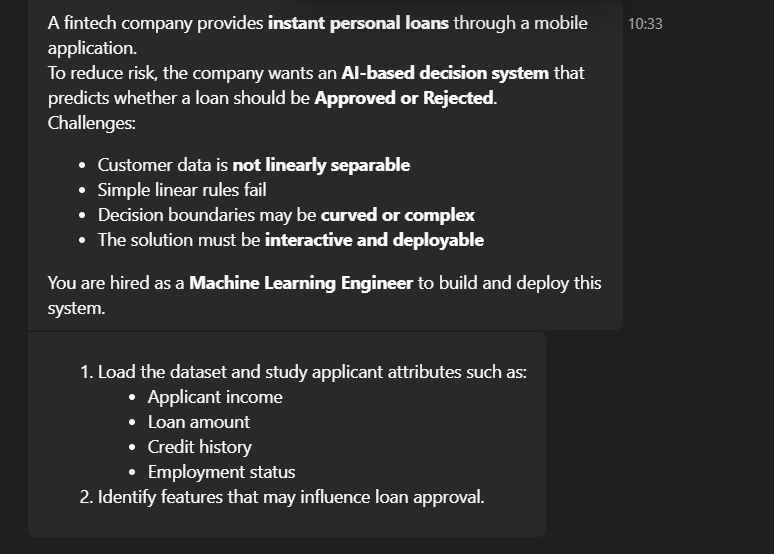

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Datasets/train_u6lujuX_CVtuZ9i.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df.size

7982

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


/tmp/ipython-input-1615142899.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
/tmp/ipython-input-1615142899.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [ ]:
X = pd.get_dummies(X, drop_first=True)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,False,False,...,False,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.000000,360.0,1.0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
610,4106,0.0,40.000000,180.0,1.0,False,False,False,False,False,...,False,True,True,False,False,True,False,False,False,False
611,8072,240.0,253.000000,360.0,1.0,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,True
612,7583,0.0,187.000000,360.0,1.0,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True




*  Build three different SVM models using:
1.Linear kernel
2.Polynomial kernel
3.RBF kernel
4.Train each model and evaluate performance **using:**


*   Accuracy
*   Precision / Recall

Compare results and identify:
Which kernel handles non-linear patterns better
Which kernel generalizes best on unseen data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)


In [ ]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)


In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Linear Kernel Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           N       0.94      0.37      0.53        43
           Y       0.75      0.99      0.85        80

    accuracy                           0.77       123
   macro avg       0.84      0.68      0.69       123
weighted avg       0.81      0.77      0.74       123

Polynomial Kernel Accuracy: 0.6504065040650406
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

RBF Kernel Accuracy: 0.6504065040650406
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.65      1.00      0.79        80

    accuracy                           0.65       12

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

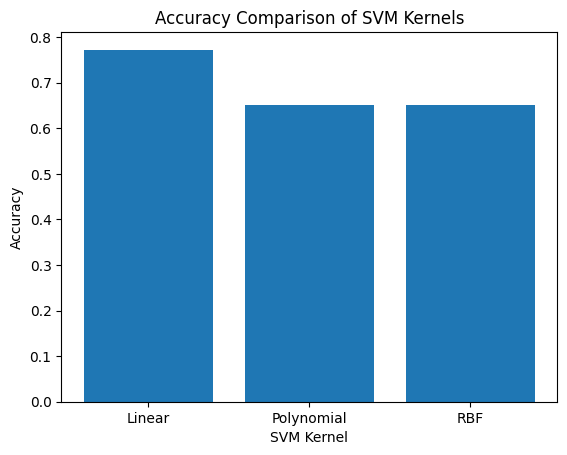

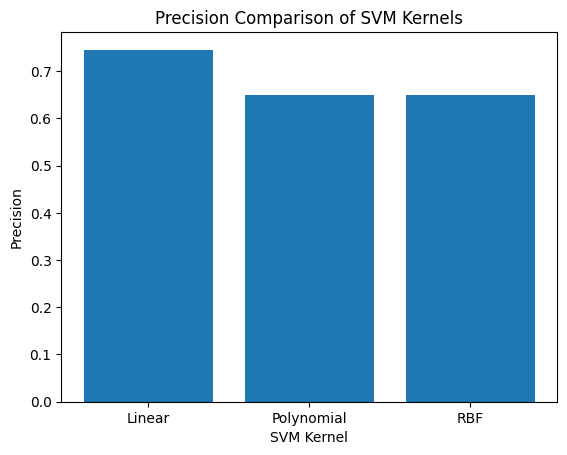

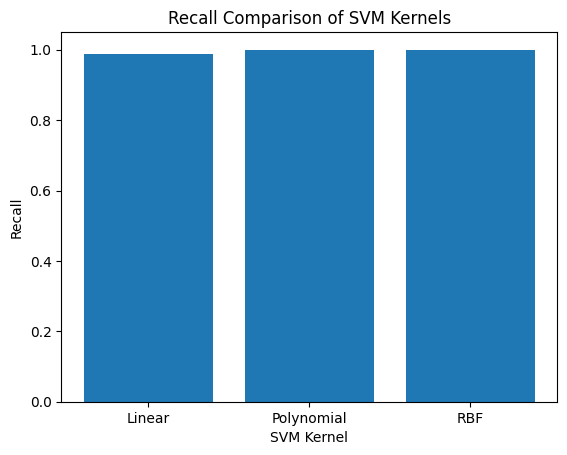

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# ---- Calculate Metrics ----
accuracy = [
    accuracy_score(y_test, y_pred_linear),
    accuracy_score(y_test, y_pred_poly),
    accuracy_score(y_test, y_pred_rbf)
]

precision = [
    precision_score(y_test, y_pred_linear, pos_label='Y'),
    precision_score(y_test, y_pred_poly, pos_label='Y'),
    precision_score(y_test, y_pred_rbf, pos_label='Y')
]

recall = [
    recall_score(y_test, y_pred_linear, pos_label='Y'),
    recall_score(y_test, y_pred_poly, pos_label='Y'),
    recall_score(y_test, y_pred_rbf, pos_label='Y')
]

kernels = ['Linear', 'Polynomial', 'RBF']

# ---- Accuracy Plot ----
plt.figure()
plt.bar(kernels, accuracy)
plt.xlabel('SVM Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of SVM Kernels')
plt.show()

# ---- Precision Plot ----
plt.figure()
plt.bar(kernels, precision)
plt.xlabel('SVM Kernel')
plt.ylabel('Precision')
plt.title('Precision Comparison of SVM Kernels')
plt.show()

# ---- Recall Plot ----
plt.figure()
plt.bar(kernels, recall)
plt.xlabel('SVM Kernel')
plt.ylabel('Recall')
plt.title('Recall Comparison of SVM Kernels')
plt.show()









*   6.Analyze misclassifications:
* How many eligible customers were rejected?  
*  How many risky customers were approved?



*   7.Answer:
*   Is it worse to reject a genuine customer or approve a risky one?

*  Which metric matters most in this business scenario?




In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rbf)
print(cm)
# [[TN  FP]
#  [FN  TP]]

[[ 0 43]
 [ 0 80]]


In [ ]:
eligible_rejected = cm[1][0]
print("Eligible customers rejected:", eligible_rejected)


Eligible customers rejected: 0


In [ ]:
risky_approved = cm[0][1]
print("Risky customers approved:", risky_approved)


Risky customers approved: 43


In [67]:
import joblib

joblib.dump(svm_linear, "svm_linear.pkl")
joblib.dump(svm_poly, "svm_poly.pkl")
joblib.dump(svm_rbf, "svm_rbf.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "features.pkl")


['features.pkl']